In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models
import torchvision.transforms as transforms

import sys, os
sys.path.append(os.pardir)
import collections
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
import cv2

from typing import List, Dict, Tuple, Any

## Pacal VOC 2007 Dataset load

In [2]:
from src.VOC_detection.VOCdownloader import VOCDetect

_dataset = VOCDetect(root='../data', year='2007')

Files already downloaded


In [3]:
image, target = _dataset[10]
target

{'annotation': {'folder': 'VOC2007',
  'filename': '000044.jpg',
  'source': {'database': 'The VOC2007 Database',
   'annotation': 'PASCAL VOC2007',
   'image': 'flickr',
   'flickrid': '340274411'},
  'owner': {'flickrid': 'Urban Echo', 'name': '?'},
  'size': {'width': '500', 'height': '333', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'chair',
    'pose': 'Unspecified',
    'truncated': '1',
    'difficult': '0',
    'bndbox': {'xmin': '1', 'ymin': '1', 'xmax': '370', 'ymax': '330'}},
   {'name': 'cat',
    'pose': 'Right',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '99', 'ymin': '101', 'xmax': '312', 'ymax': '213'}}]}}

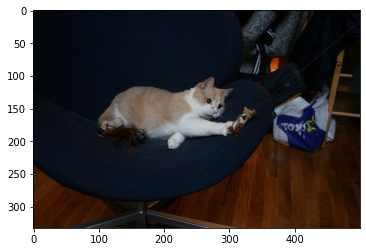

In [4]:
plt.imshow(image)

In [5]:
from src.VOC_detection.utils import *

voc_dict = parse_from_target(target)
voc_dict

{'labels': ['chair', 'cat'],
 'bboxes': [[1, 1, 370, 330], [99, 101, 312, 213]],
 'size': (500, 333)}

In [6]:
bboxes = voc_dict['bboxes']
size = voc_dict['size']
labels = voc_dict['labels']

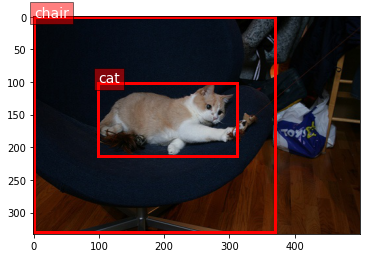

In [11]:
fig, ax = plt.subplots(1)
ax.imshow(image)
index = 0
for bbox in bboxes:
    xmin = bbox[0]
    ymin = bbox[1]
    xmax = bbox[2]
    ymax = bbox[3]

    bbox = patches.Rectangle(xy=(xmin, ymin), width=(xmax-xmin), height=(ymax-ymin), linewidth=3, edgecolor='red', facecolor='none')
    ax.add_patch(bbox)
    ax.text(xmin, ymin, labels[index], size=14, color='white', bbox=dict(facecolor='red', alpha=0.5))
    index += 1
plt.show()

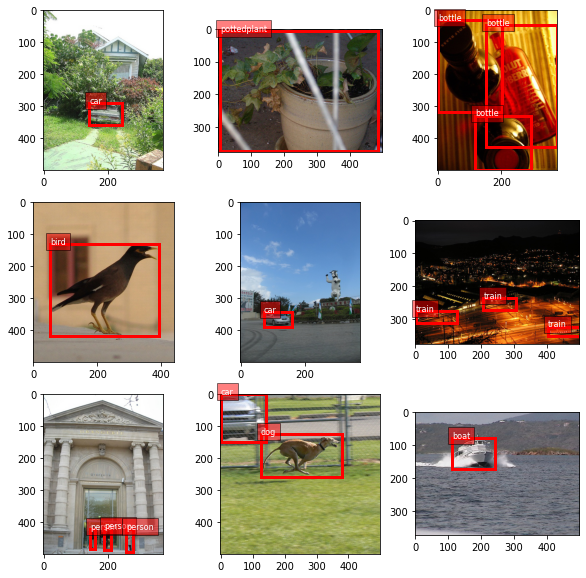

In [33]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(_dataset), size=(1,)).item()
    image, target = _dataset[sample_idx]
    
    voc_dict = parse_from_target(target)
    bboxes = voc_dict['bboxes']
    size = voc_dict['size']
    labels = voc_dict['labels']

    ax = figure.add_subplot(cols, rows, i)
    ax.imshow(image)
    index = 0
    for bbox in bboxes:
        xmin = bbox[0]
        ymin = bbox[1]
        xmax = bbox[2]
        ymax = bbox[3]

        bbox = patches.Rectangle(xy=(xmin, ymin), width=(xmax-xmin), height=(ymax-ymin), linewidth=3, edgecolor='red', facecolor='none')
        ax.add_patch(bbox)
        ax.text(xmin, ymin, labels[index], size=8, color='white', bbox=dict(facecolor='red', alpha=0.5))
        index += 1
    plt.axis("on")